# 1. pre-procesamiento

## 1.1 Limpieza del texto

In [1]:
nombre_arx = 'raw_corpus.txt'
desde_linea = 2 # empieza a leer desde la linea

with open(nombre_arx,'r',encoding="utf8") as file:
    lineas_arx = file.readlines()

# OJO! se borran las lineas de menos de 3 caracteres    
lineas_arx = [linea[3:] if linea[1]==":" else linea for linea in lineas_arx if len(linea)>3]
texto2 = "".join(lineas_arx[desde_linea-1:])
    
texto_limpio = ""
flag1 = False # para borrar las palabras <encerradas en flechas>
flag2 = False # para las mayusculas que faltan

pa = 0 # contador de puntos aparte

for l in texto2:
    if flag1:
        if l == ">":
            flag1 = False
        continue
    if l in {"\n",".","!","?"}:
         texto_limpio += l
         flag2 = True
         if l == '\n':
             pa += 1
    elif l.isalnum() or l in " ,;¡'¿": ##enlaza varios else if
         texto_limpio += l.upper() if flag2 else l # mayusculas
         if not l.isspace():
             flag2 = False
    elif l == "<":
        flag1 = True
        continue
     
print("Palabras: ",len(texto_limpio.split()))
print("Öraciones: ", pa + len(texto_limpio.split(".")))
    
with open(nombre_arx.split(".")[0]+"_procesado.txt","w",encoding="utf8") as file:
    file.write(texto_limpio) # escritura de archivo


Palabras:  1614801
Öraciones:  115397


In [2]:
## Señalo las librerías que usaré 
from nltk import sent_tokenize
import spacy
import re

In [3]:
## tokenizo las oraciones 
oraciones=sent_tokenize(texto_limpio)

In [4]:
## elimino los saltos de línea
oraciones=[oracion.replace('\n','').strip() for oracion in oraciones]

In [5]:
oraciones[:2]

['Bueno estamos con P M  de Alcalá de Henares el veinticinco de junio  del noventa y ocho  bueno P como ya nos   ya hicimos la entrevista vamos a repetirla  eeh te preguntaba entonces  la otra vez  que normalmente tú cómo tratas a la gente ¿de  de tú o de usted?',
 'Siempre íbamos al tú  Siempre   Eso está  claroHhSiempre al tú  siempre había excepciones que es lo que comentábamos pues eeh gente  que de apariencia  te da para  no te da la  eeh por decirlo de alguna forma  la confianza de   de tratarla de tú entonces ibas al usted pero normalmente de  o a la gente mayor que era lo que decíamos del pueblo  gente mayor que de siempre lo  la familia los padres los abuelos la habían tratado  de usted entonces  siempre te queda eso pero si no  siempre  siempre vas al tú  al  tú  se man    ¿se man  tiene ese  ese trato?']

In [6]:
## convierto la mayúsuclas en minúsculas 
oraciones=[string.lower() for string in oraciones]

In [7]:
## remuevo la puntuación
import string

def remover_puntuacion(s): 
    for c in string.punctuation:
        s=s.replace(c,"")
    return s

In [8]:
## creo una lista donde se guarde mi texto sin puntuación
presealimpio =[]
for oracion in oraciones:
    presealimpio += [remover_puntuacion(oracion)]

In [9]:
presealimpio[:2]

['bueno estamos con p m  de alcalá de henares el veinticinco de junio  del noventa y ocho  bueno p como ya nos   ya hicimos la entrevista vamos a repetirla  eeh te preguntaba entonces  la otra vez  que normalmente tú cómo tratas a la gente ¿de  de tú o de usted',
 'siempre íbamos al tú  siempre   eso está  clarohhsiempre al tú  siempre había excepciones que es lo que comentábamos pues eeh gente  que de apariencia  te da para  no te da la  eeh por decirlo de alguna forma  la confianza de   de tratarla de tú entonces ibas al usted pero normalmente de  o a la gente mayor que era lo que decíamos del pueblo  gente mayor que de siempre lo  la familia los padres los abuelos la habían tratado  de usted entonces  siempre te queda eso pero si no  siempre  siempre vas al tú  al  tú  se man    ¿se man  tiene ese  ese trato']

In [10]:
## número de oraciones del corpus
len(presealimpio)

44418

In [11]:
## finalmente, contaré la cantidad de palabras y palabras únicas en el texto
palabraspresea = []

for oracion in presealimpio:
    palabraspresea+=[oracion.split(' ')]

In [12]:
listapalabras = []

for oracion in palabraspresea:
    palabras2= []
    for word in oracion:
        if len(word) >0:
            palabras2+=[word]
            
    listapalabras+=[palabras2]
        

In [13]:
listapalabras[:2]

[['bueno',
  'estamos',
  'con',
  'p',
  'm',
  'de',
  'alcalá',
  'de',
  'henares',
  'el',
  'veinticinco',
  'de',
  'junio',
  'del',
  'noventa',
  'y',
  'ocho',
  'bueno',
  'p',
  'como',
  'ya',
  'nos',
  'ya',
  'hicimos',
  'la',
  'entrevista',
  'vamos',
  'a',
  'repetirla',
  'eeh',
  'te',
  'preguntaba',
  'entonces',
  'la',
  'otra',
  'vez',
  'que',
  'normalmente',
  'tú',
  'cómo',
  'tratas',
  'a',
  'la',
  'gente',
  '¿de',
  'de',
  'tú',
  'o',
  'de',
  'usted'],
 ['siempre',
  'íbamos',
  'al',
  'tú',
  'siempre',
  'eso',
  'está',
  'clarohhsiempre',
  'al',
  'tú',
  'siempre',
  'había',
  'excepciones',
  'que',
  'es',
  'lo',
  'que',
  'comentábamos',
  'pues',
  'eeh',
  'gente',
  'que',
  'de',
  'apariencia',
  'te',
  'da',
  'para',
  'no',
  'te',
  'da',
  'la',
  'eeh',
  'por',
  'decirlo',
  'de',
  'alguna',
  'forma',
  'la',
  'confianza',
  'de',
  'de',
  'tratarla',
  'de',
  'tú',
  'entonces',
  'ibas',
  'al',
  'usted',
 

In [14]:
palabrasfinal = []

for oracion in listapalabras:
    for palabra in oracion:
        palabrasfinal += [palabra]

In [15]:
palabrasfinal[:10]

['bueno', 'estamos', 'con', 'p', 'm', 'de', 'alcalá', 'de', 'henares', 'el']

In [16]:
len(palabrasfinal), len(set(palabrasfinal))

(1581464, 62864)

## 1.2 búsqueda y etiquetado 


### rastreo de adverbios terminados en -mente

In [17]:
## primero, buscaré y contaré las palabras terminadas en -mente, para esto uso re
patron= r'\w+mente'

In [18]:
match = re.findall(r"\w+mente\b", texto_limpio,)

In [19]:
match[:15]

['normalmente',
 'normalmente',
 'Normalmente',
 'normalmente',
 'rápidamente',
 'rápidamente',
 'tranquilamente',
 'Normalmente',
 'Normalmente',
 'justamente',
 'realmente',
 'solamente',
 'exactamente',
 'seguramente',
 'justamente']

In [20]:
#números de adverbios terminados en -mente
len(match)

5285

In [21]:
## crearé un diccionario que contenga los adverbios de mi corpus y su cantidad de ocurrencias, para ello creo una 
## lista de palabras únicas, y recorro el texto buscándolas
palabras_unicas = []
for palabra in match:
    if palabra not in palabras_unicas:
        palabras_unicas += [palabra]

In [22]:
D = {palabra:0 for palabra in palabras_unicas}

In [23]:
for palabra in match:
  
  D[palabra] += 1

In [24]:
D['naturalmente']

17

In [25]:
#adverbios terminados en -mente
print(len(D))

449


In [26]:
## Diccionarios con tipos de adverbios

In [27]:
L=['ciertamente', 'evidentemente', 'incuestionablemente', 'indiscutiblemente', 'indudablemente', 'obviamente', 'realmente', 'verdaderamente','aparentemente', 'hipotéticamente', 'nominalmente', 'presumiblemente', 'presuntamente', 'pretendidamente','supuestamente', 'teóricamente', 'virtualmente', 'francamente', 'honestamente', 'honradamente', 'sinceramente']

In [30]:
Dreforzadores={}
L1=['ciertamente', 'evidentemente', 'incuestionablemente', 'indiscutiblemente', 'indudablemente', 'obviamente', 'realmente', 'verdaderamente']
## está bacán esto
for adverbio in L1:
    Dreforzadores[adverbio]=texto_limpio.count(adverbio)

In [31]:
Drestrictores={}
L2=['aparentemente', 'hipotéticamente', 'nominalmente', 'presumiblemente', 'presuntamente', 'pretendidamente','supuestamente', 'teóricamente', 'virtualmente']
for adverbio in L2:
    Drestrictores[adverbio]=texto_limpio.count(adverbio)

In [32]:
Dhablante={}
L3=['francamente', 'honestamente', 'honradamente', 'sinceramente']
## está bacán esto
for adverbio in L3:
    Dhablante[adverbio]=texto_limpio.count(adverbio)

In [33]:
Dreforzadores

{'ciertamente': 3,
 'evidentemente': 46,
 'incuestionablemente': 0,
 'indiscutiblemente': 6,
 'indudablemente': 18,
 'obviamente': 92,
 'realmente': 501,
 'verdaderamente': 21}

In [34]:
Drestrictores

{'aparentemente': 8,
 'hipotéticamente': 0,
 'nominalmente': 0,
 'presumiblemente': 0,
 'presuntamente': 0,
 'pretendidamente': 0,
 'supuestamente': 37,
 'teóricamente': 2,
 'virtualmente': 0}

In [35]:
Dhablante

{'francamente': 5, 'honestamente': 10, 'honradamente': 0, 'sinceramente': 37}

In [36]:
## Cantidad de adverbios evidenciales
sum(Dreforzadores.values())


687

In [37]:
sum(Drestrictores.values())


47

In [38]:
sum(Dhablante.values())

52

### Oraciones con adverbios evidenciales

In [39]:
D_oraciones_mente = {adv:[] for adv in L}

In [41]:
for oracion in presealimpio:
    for adv in L:
        O = oracion.split(' ')
        if adv in O:
            D_oraciones_mente[adv]+=[O]

In [42]:
D_oraciones_mente['teóricamente']

[['porque',
  '',
  'bueno',
  '',
  'somos',
  'dos',
  'desconocidos',
  'teóricamente',
  '',
  '',
  'que',
  'aunque',
  '',
  '',
  'teóricamente',
  'teo',
  '',
  'nos',
  'conozcamos',
  'así',
  'de',
  'vista',
  'y',
  'tal',
  'pero',
  'que',
  '',
  'no',
  'hemos',
  'tenido',
  'nunca',
  'tampoco',
  'ningún',
  'vínculo',
  'así',
  '',
  'rarillo',
  'ni',
  'nada',
  'y',
  'claro',
  '',
  'y',
  'es',
  'lo',
  'que',
  'te',
  'ocurre',
  'que',
  'parece',
  'como',
  'todo',
  'que',
  'te',
  'pones',
  'a',
  'hablar',
  'de',
  'un',
  'tema',
  '',
  'y',
  'dices',
  '',
  'bueno',
  'ahora',
  'de',
  'qué',
  '',
  '',
  'sí',
  'es',
  'el',
  'he',
  '',
  '',
  'es',
  'el',
  'hechode',
  'qué',
  'hablo',
  'yo',
  'ahora',
  '',
  'eso',
  'es',
  'casi',
  'romper',
  'un',
  'poquillo',
  'el',
  'hielo',
  '¿no'],
 ['sí',
  '',
  'bueno',
  'es',
  'que',
  'pri',
  '',
  'ésta',
  'en',
  'principio',
  'fue',
  'de',
  'unos',
  '',
  '',
  '

In [43]:
oraciones_adv = []

for adv in D_oraciones_mente.keys():
    oraciones_adv+=D_oraciones_mente[adv]

In [44]:
len(oraciones_adv)

714

### co-occurrencias de adverbios evidenciales terminados en -mente

In [45]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(listapalabras,L_words):
    
    G=nx.Graph()
    for sentence in listapalabras:
        if len(sentence)>1:
            for word in L_words:
                word_index = []
                for i in range(len(sentence)):
                    if word == sentence[i]:
                        word_index+=[i]
                pairs = []
                for index in word_index:
                    if index-1 in range(len(sentence)):
                        if sentence[index-1]!='':
                            pairs+=[[index,index-1]]
                    if index+1 in range(len(sentence)):
                        if sentence[index+1]!='':
                            pairs+=[[index,index+1]]
            
                for pair in pairs:
                    if G.has_edge(sentence[pair[0]],sentence[pair[1]])==False:
                        G.add_edge(sentence[pair[0]],sentence[pair[1]],weight=1)
                    else:
                        x=G[sentence[pair[0]]][sentence[pair[1]]]['weight']
                        G[sentence[pair[0]]][sentence[pair[1]]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0.subgraph([node for node in G0.nodes() if node in L or sum([G.has_edge(node, l) for l in L])])

In [46]:
G=GoW(listapalabras,L)

In [47]:
import matplotlib.pyplot as plt

def plotG_centrality(G):
    
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:50]))[0] or i in L}
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 50, node_color='orange',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    #plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('globalpresea.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

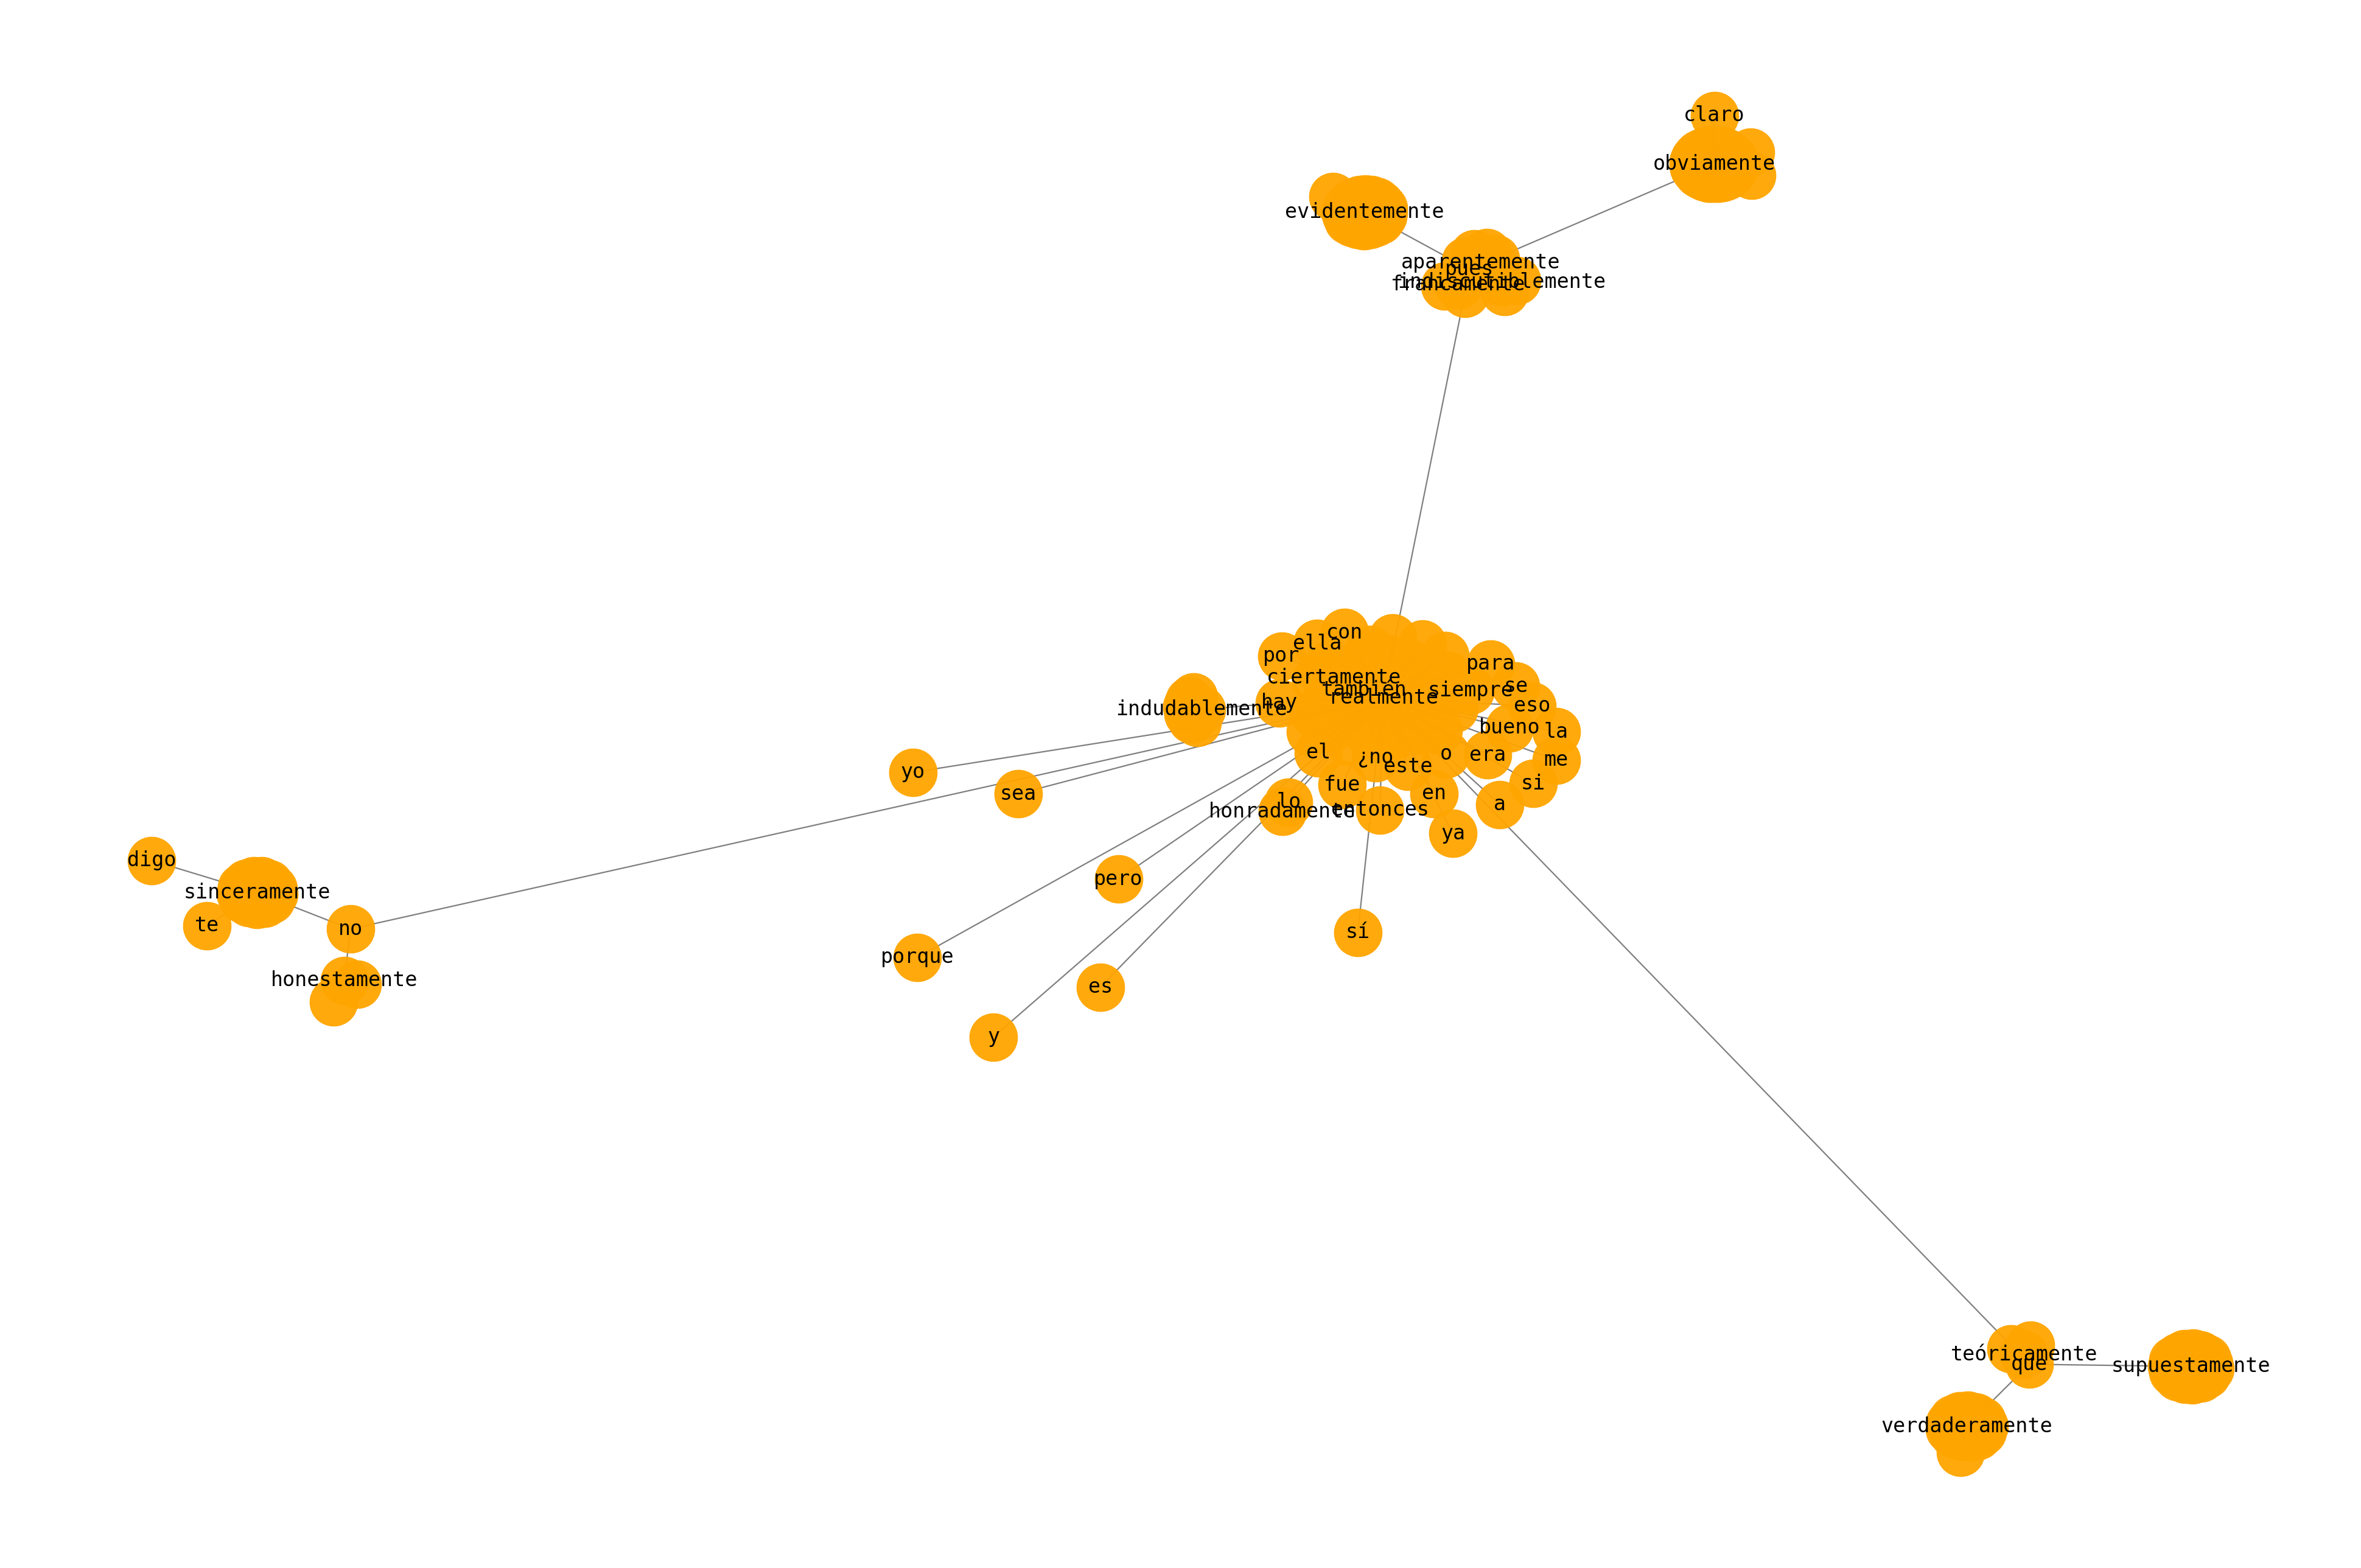

In [48]:
plotG_centrality(G)

In [49]:
def ranking(palabra,k):
    red = G
    return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]

In [50]:
for p in L:
    if p in G.nodes():
        print(p,ranking(p,5))

ciertamente ['también', 'cone', 'empezaron', 'pero', 'y']
evidentemente ['pues', 'pero', 'sí', 'porque', 'y']
indiscutiblemente ['que', 'sea', 'pues', 'necesitas', 'eeh']
indudablemente ['hay', 'que', 'pero', 'sí', 'la']
obviamente ['pues', 'que', 'no', 'y', 'bueno']
realmente ['que', 'no', 'y', 'pues', 'porque']
verdaderamente ['que', 'era', 'necesita', 'me', 'te']
aparentemente ['hacía', 'decidió', 'por', 'actitud', 'respetuosa']
supuestamente ['que', 'y', 'ahí', 'ya', 'en']
teóricamente ['desconocidos', 'que', 'aunque', 'teo', 'ahora']
francamente ['pues', 'también', 'a', 'recuerdo', 'por']
honestamente ['no', 'hijos', 'que', 'bien', 'nos']
honradamente ['i', 'lo']
sinceramente ['digo', 'no', 'sí', 'que', 'te']


#### Reforzadores de verdad

In [68]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(listapalabras,L1_words):
    
    G=nx.Graph()
    for sentence in listapalabras:
        if len(sentence)>1:
            for word in L1_words:
                word_index = []
                for i in range(len(sentence)):
                    if word == sentence[i]:
                        word_index+=[i]
                pairs = []
                for index in word_index:
                    if index-1 in range(len(sentence)):
                        if sentence[index-1]!='':
                            pairs+=[[index,index-1]]
                    if index+1 in range(len(sentence)):
                        if sentence[index+1]!='':
                            pairs+=[[index,index+1]]
            
                for pair in pairs:
                    if G.has_edge(sentence[pair[0]],sentence[pair[1]])==False:
                        G.add_edge(sentence[pair[0]],sentence[pair[1]],weight=1)
                    else:
                        x=G[sentence[pair[0]]][sentence[pair[1]]]['weight']
                        G[sentence[pair[0]]][sentence[pair[1]]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0.subgraph([node for node in G0.nodes() if node in L1 or sum([G.has_edge(node, l) for l in L1])])

In [69]:
G=GoW(listapalabras,L1)

In [70]:
import matplotlib.pyplot as plt

def plotG_centrality(G):
    
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:50]))[0] or i in L1}
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 50, node_color='orange',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    #plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('reforzadorpresea.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

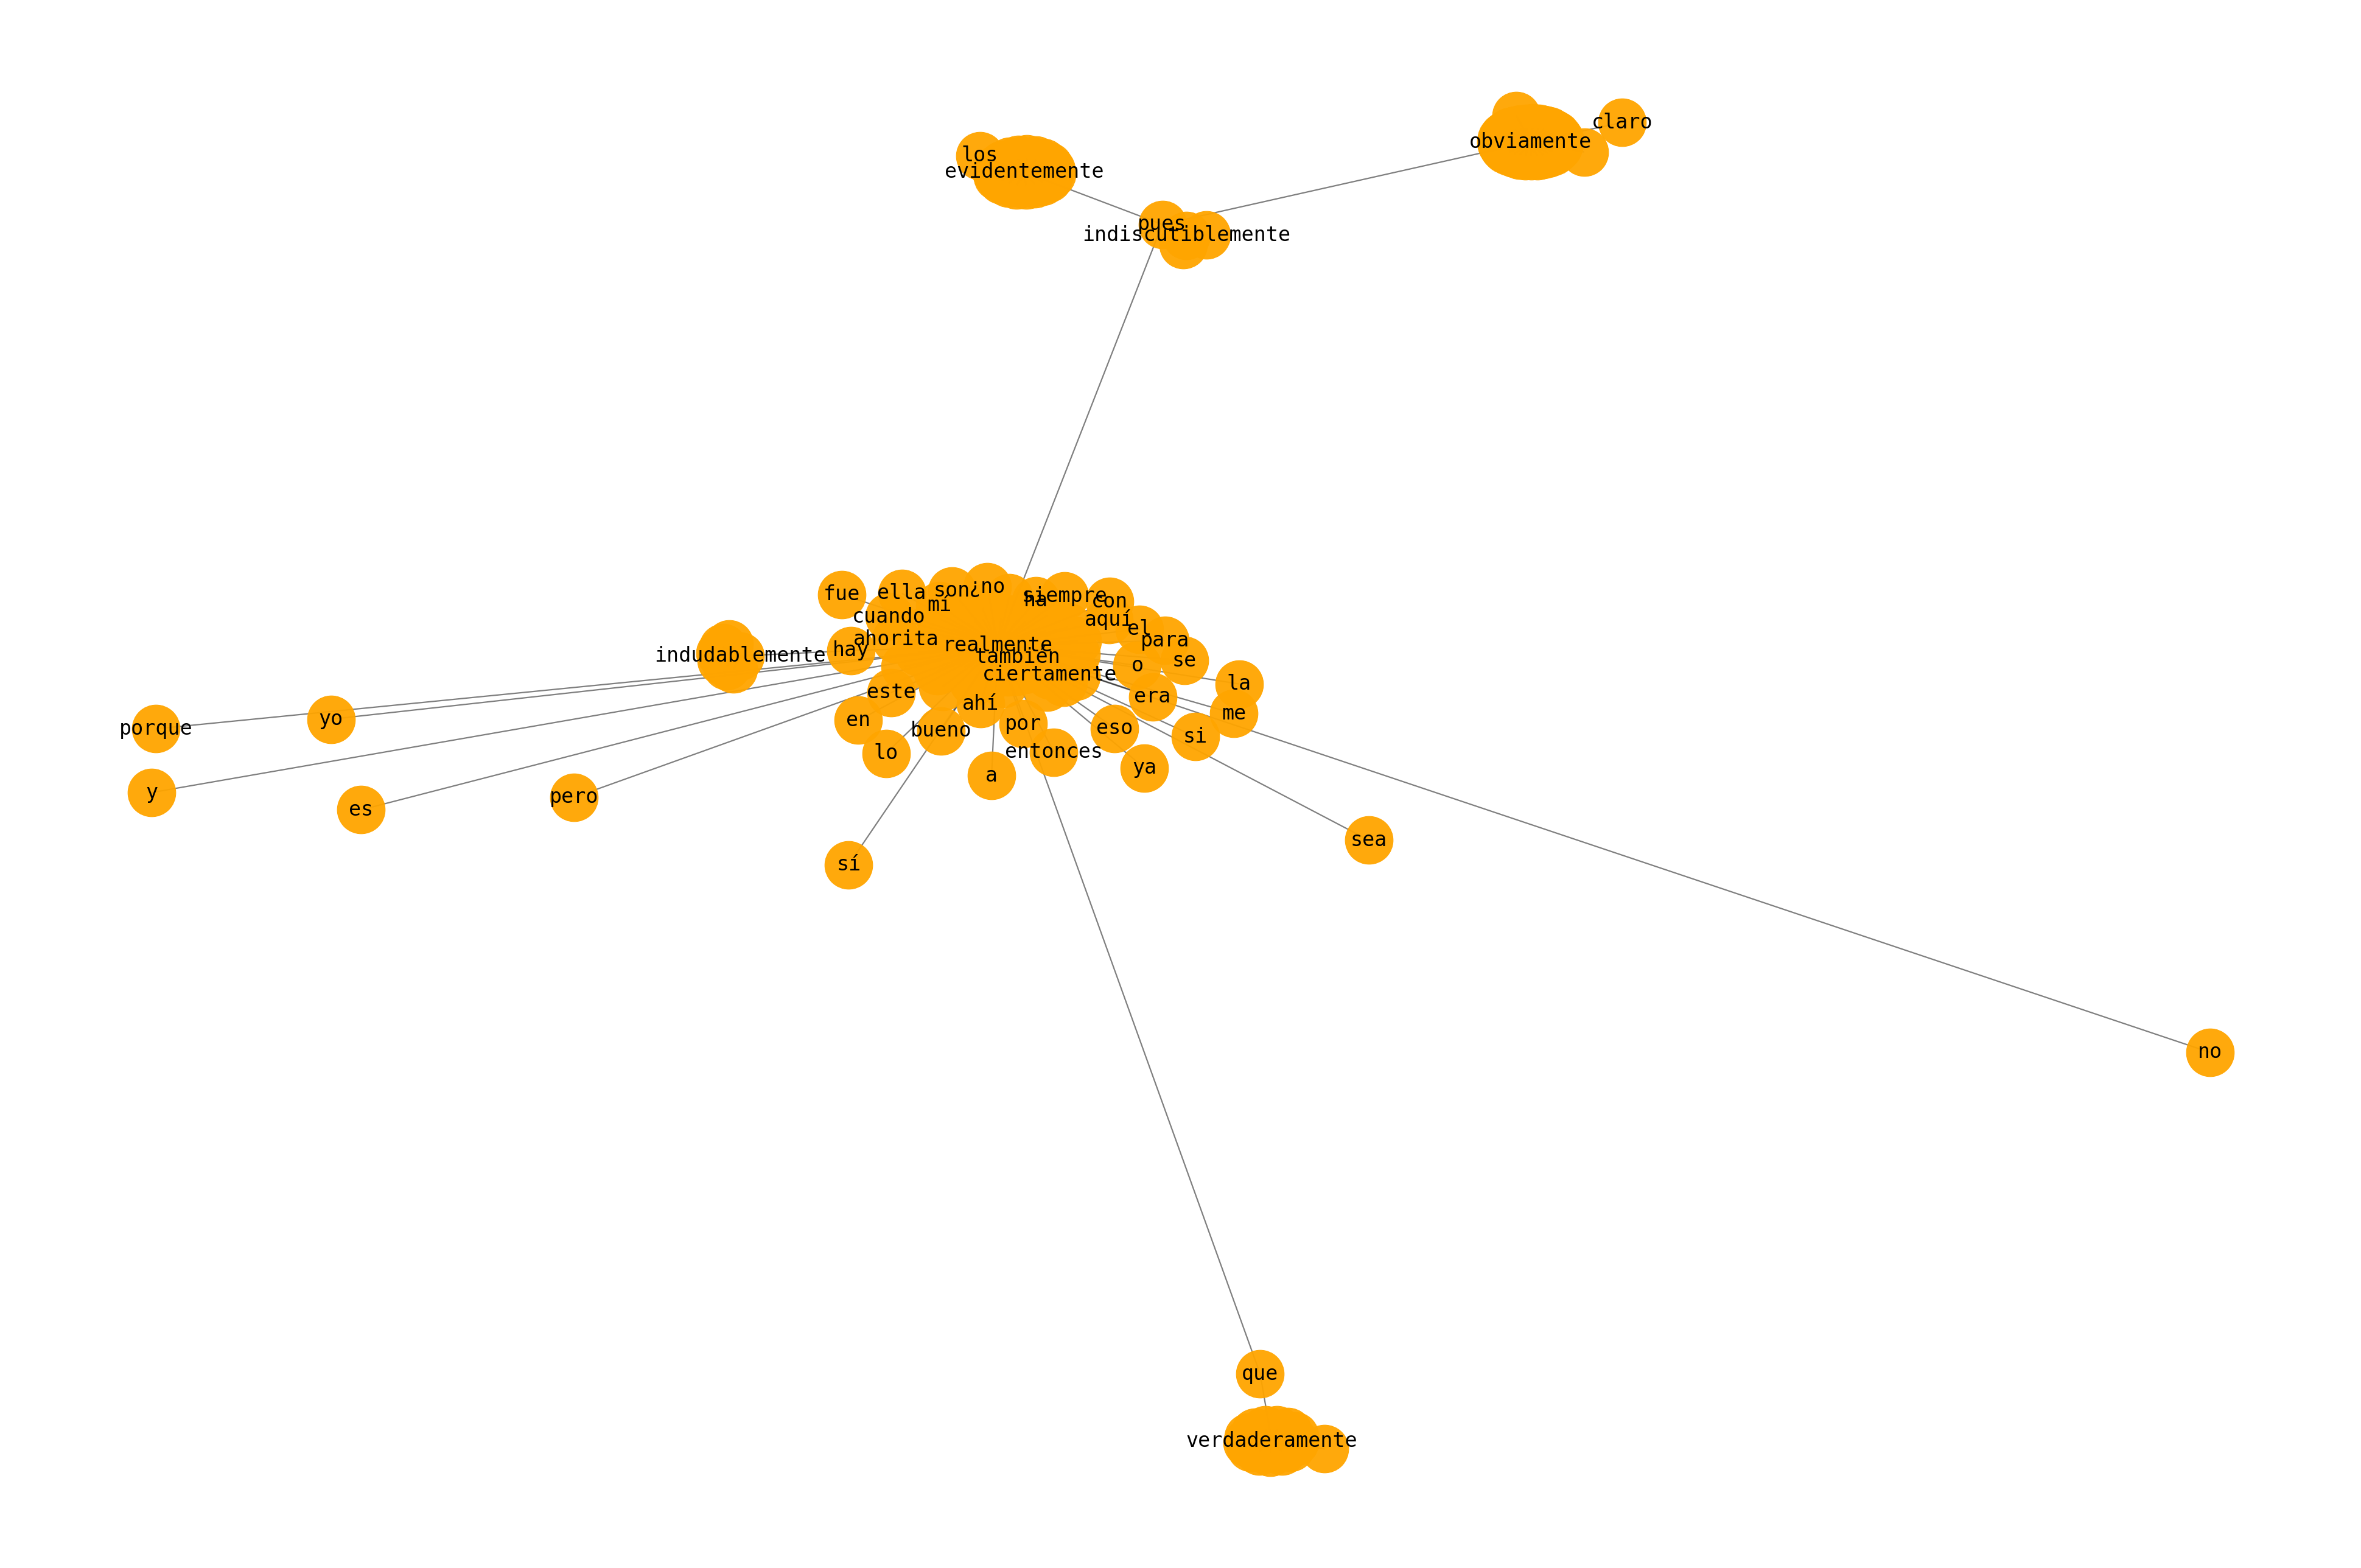

In [71]:
plotG_centrality(G)

In [72]:
for p in L1:
    if p in G.nodes():
        print(p,ranking(p,5))

ciertamente ['también', 'cone', 'empezaron', 'pero', 'y']
evidentemente ['pues', 'pero', 'sí', 'porque', 'y']
indiscutiblemente ['que', 'sea', 'pues', 'necesitas', 'eeh']
indudablemente ['hay', 'que', 'pero', 'sí', 'la']
obviamente ['pues', 'que', 'no', 'y', 'bueno']
realmente ['que', 'no', 'y', 'pues', 'porque']
verdaderamente ['que', 'era', 'necesita', 'me', 'te']


#### Restrictores de verdad

In [73]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(listapalabras,L2_words):
    
    G=nx.Graph()
    for sentence in listapalabras:
        if len(sentence)>1:
            for word in L2_words:
                word_index = []
                for i in range(len(sentence)):
                    if word == sentence[i]:
                        word_index+=[i]
                pairs = []
                for index in word_index:
                    if index-1 in range(len(sentence)):
                        if sentence[index-1]!='':
                            pairs+=[[index,index-1]]
                    if index+1 in range(len(sentence)):
                        if sentence[index+1]!='':
                            pairs+=[[index,index+1]]
            
                for pair in pairs:
                    if G.has_edge(sentence[pair[0]],sentence[pair[1]])==False:
                        G.add_edge(sentence[pair[0]],sentence[pair[1]],weight=1)
                    else:
                        x=G[sentence[pair[0]]][sentence[pair[1]]]['weight']
                        G[sentence[pair[0]]][sentence[pair[1]]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0.subgraph([node for node in G0.nodes() if node in L2 or sum([G.has_edge(node, l) for l in L2])])

In [74]:
G=GoW(listapalabras,L2)

In [75]:
import matplotlib.pyplot as plt

def plotG_centrality(G):
    
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:50]))[0] or i in L2}
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 50, node_color='orange',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    #plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('restrictorpresea.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

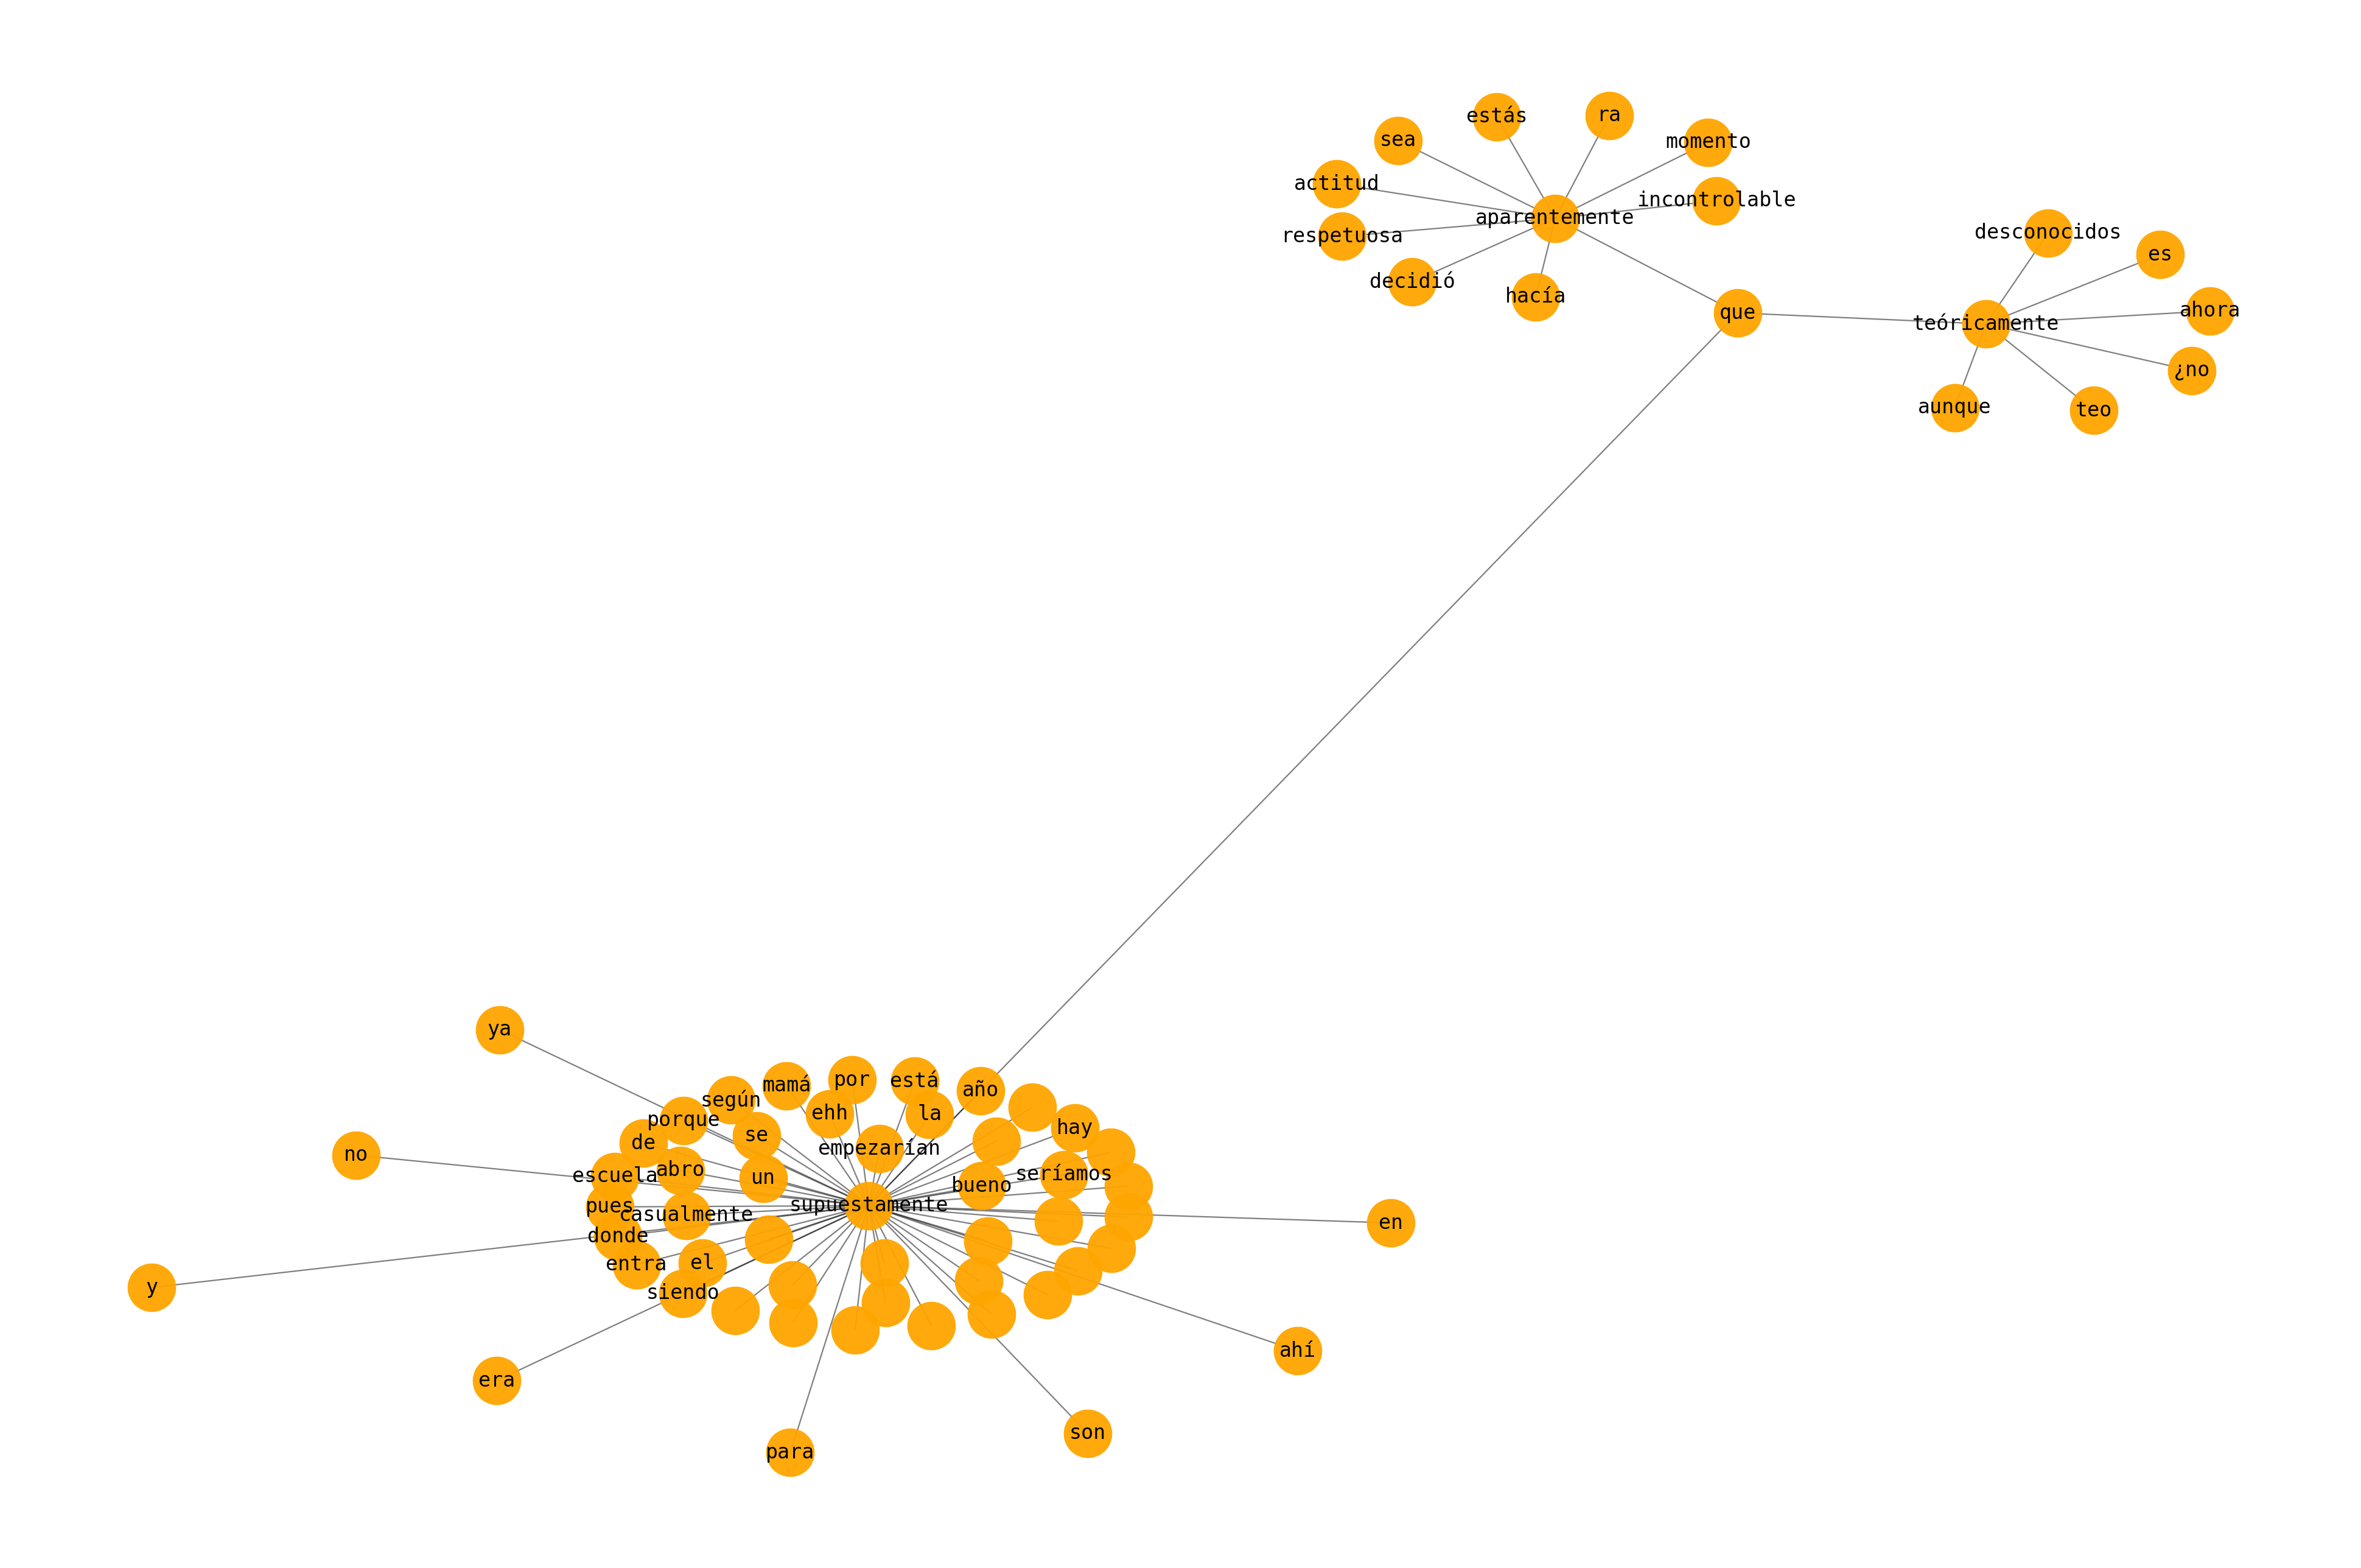

In [76]:
plotG_centrality(G)

In [77]:
def ranking(palabra,k):
    red = G
    return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]

In [78]:
for p in L2:
    if p in G.nodes():
        print(p,ranking(p,5))

aparentemente ['hacía', 'decidió', 'por', 'actitud', 'respetuosa']
supuestamente ['que', 'y', 'ahí', 'ya', 'en']
teóricamente ['desconocidos', 'que', 'aunque', 'teo', 'ahora']


#### Orientados al hablante

In [79]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(listapalabras,L3_words):
    
    G=nx.Graph()
    for sentence in listapalabras:
        if len(sentence)>1:
            for word in L3_words:
                word_index = []
                for i in range(len(sentence)):
                    if word == sentence[i]:
                        word_index+=[i]
                pairs = []
                for index in word_index:
                    if index-1 in range(len(sentence)):
                        if sentence[index-1]!='':
                            pairs+=[[index,index-1]]
                    if index+1 in range(len(sentence)):
                        if sentence[index+1]!='':
                            pairs+=[[index,index+1]]
            
                for pair in pairs:
                    if G.has_edge(sentence[pair[0]],sentence[pair[1]])==False:
                        G.add_edge(sentence[pair[0]],sentence[pair[1]],weight=1)
                    else:
                        x=G[sentence[pair[0]]][sentence[pair[1]]]['weight']
                        G[sentence[pair[0]]][sentence[pair[1]]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0.subgraph([node for node in G0.nodes() if node in L3 or sum([G.has_edge(node, l) for l in L3])])

In [80]:
G=GoW(listapalabras,L3)

In [81]:
import matplotlib.pyplot as plt

def plotG_centrality(G):
    
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:50]))[0] or i in L3}
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 50, node_color='orange',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    #plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('hablantepresea.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

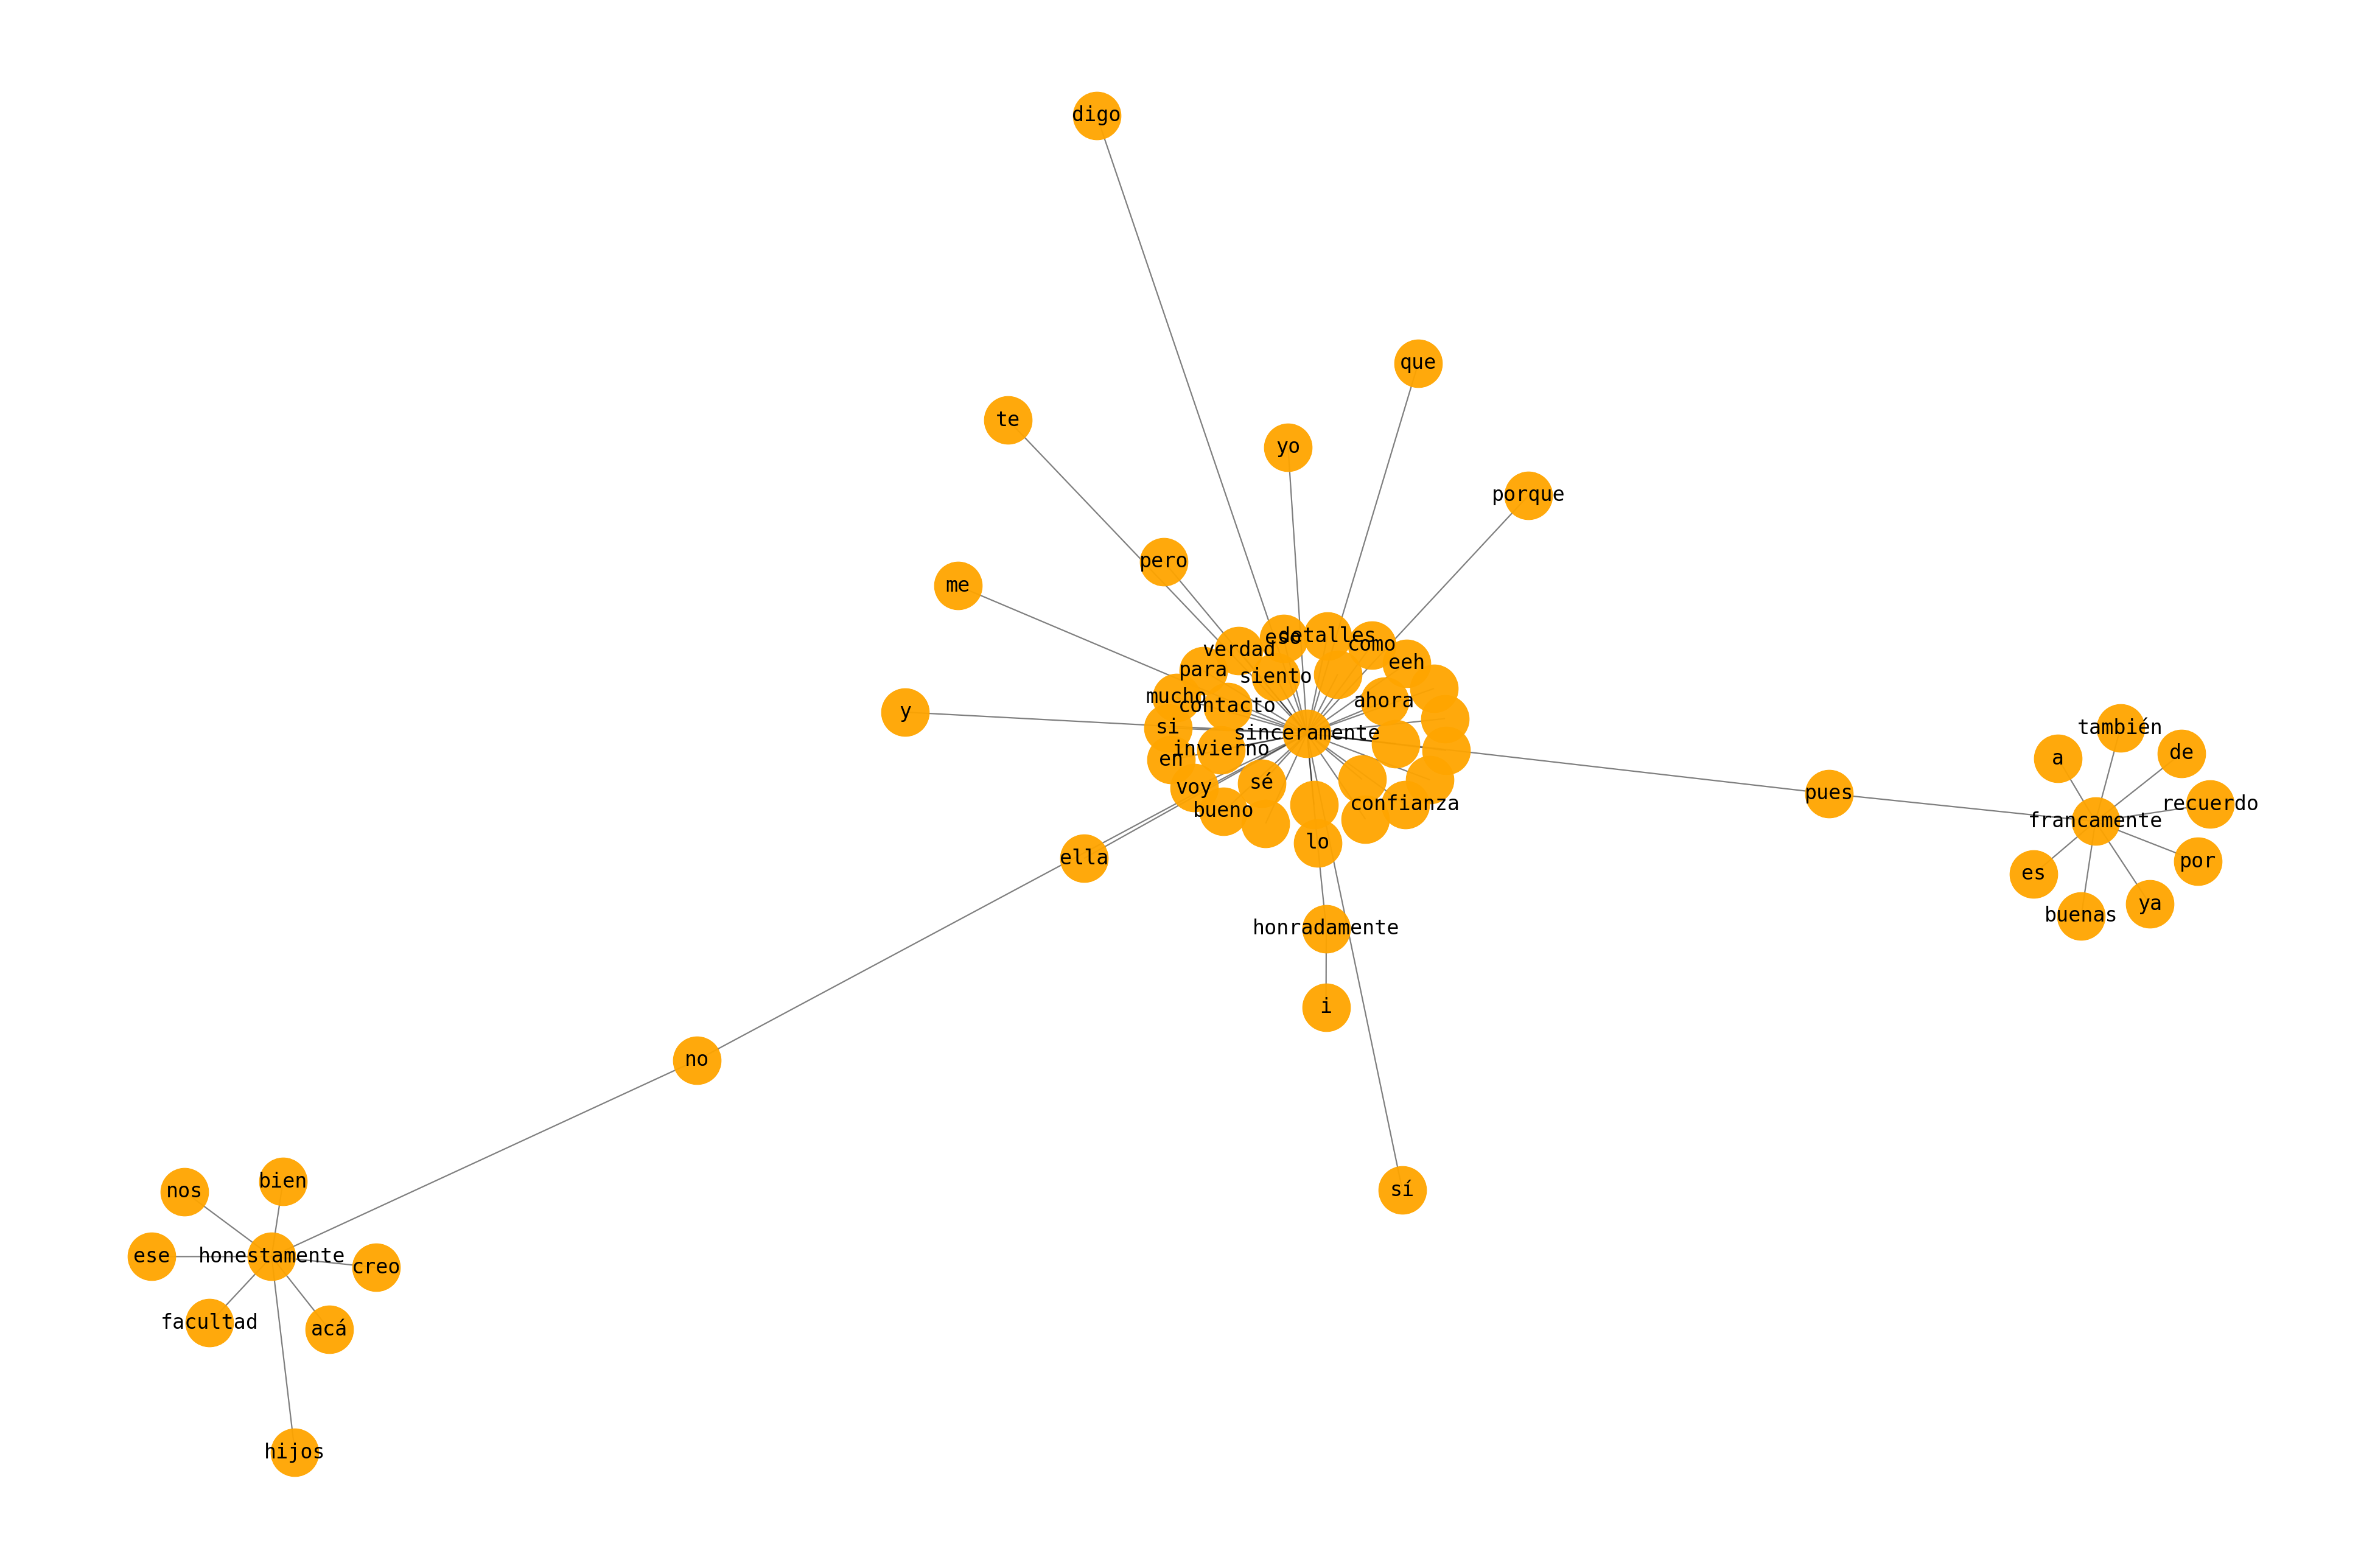

In [82]:
plotG_centrality(G)

In [83]:
def ranking(palabra,k):
    red = G
    return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]

In [84]:
for p in L3:
    if p in G.nodes():
        print(p,ranking(p,5))

francamente ['pues', 'también', 'a', 'recuerdo', 'por']
honestamente ['no', 'hijos', 'que', 'bien', 'nos']
honradamente ['i', 'lo']
sinceramente ['digo', 'no', 'sí', 'que', 'te']


### obtención de información gramatical global del corpus

In [131]:
nlp = spacy.load("es_core_news_sm")
infogram=[]

## uso un ciclo for que recorre el texto lematizando
for oracion in presealimpio:
    doc = nlp(oracion)
    infogram+=[(token.text.lower(),token.pos_) for token in doc]

In [132]:
infogram=[par for par in infogram if par[1] !='SPACE']

In [133]:
tokens=[par[0] for par in infogram]

In [134]:
len(tokens), len(set(tokens))

(1618395, 60776)

In [135]:
##Todos los adv del corpus 
adverbios=[]
for par in infogram:
    if par[1]=='ADV':
        adverbios+=[par[0]]

In [136]:
##numero total de adverbios
print(len(adverbios),len(set(adverbios)))

161869 1735


In [137]:
adverbios[:100]

['ya',
 'ya',
 'entonces',
 'normalmente',
 'siempre',
 'siempre',
 'clarohhsiempre',
 'siempre',
 'no',
 'entonces',
 'normalmente',
 'siempre',
 'entonces',
 'siempre',
 'no',
 'siempre',
 'siempre',
 'no',
 'normalmente',
 'entonces',
 'siempre',
 'no',
 'no',
 'no',
 'no',
 'siempre',
 'normalmente',
 'siempre',
 'casi',
 'siempre',
 'rápidamente',
 'así',
 'no',
 'más',
 'más',
 'muy',
 'más',
 'luego',
 'no',
 'más',
 'así',
 'rápidamente',
 'hu',
 'no',
 'no',
 'no',
 'hoy',
 'hoy',
 'hoy',
 'no',
 'siempre',
 'hoy',
 'ya',
 'ya',
 'ya',
 'ahora',
 'ya',
 'no',
 'ahora',
 'ya',
 'no',
 'entonces',
 'tranquilamente',
 'más',
 'tarde',
 'normalmente',
 'aquí',
 'cerca',
 'hoy',
 'luego',
 'ya',
 'acá',
 'luego',
 'ya',
 'dentro',
 'así',
 'alrededor',
 'normalmente',
 'no',
 'ya',
 'luego',
 'ya',
 'allí',
 'no',
 'allí',
 'luego',
 'ya',
 'acá',
 'mucho',
 'no',
 'ya',
 'mucho',
 'entonces',
 'atrás',
 'entonces',
 're',
 'no',
 'entonces',
 'atrás',
 'no']

In [139]:
## encontré este código en la página de spacy, me servirá para saber cuántas palabras encuentro por categoría, esto me
## permitirá tener un mejor conteo de la cantidad de palabras totales del texto, y además, calcular proporciones
## entre adverbios y otras clases. 
analisis = []
for s in presealimpio:
    doc = nlp(s)
    analisis+=[doc]

In [140]:
tokens, pos = [], []

for token in analisis[0]:
    tokens+=[token.text], 
    pos+=[token.pos_]

In [141]:
tokens, pos = [], []

for token in analisis[15]:
    tokens+=[token.text], 
    pos+=[token.pos_]

In [142]:
sustantivos = 0
verbos = 0
adjetivos = 0
det = 0
adv = 0
adp = 0
aux = 0
conj = 0
cconj = 0
interj = 0
conj = 0
num = 0
part = 0
pron = 0
propn = 0
sconj = 0
otros = 0
for doc in analisis:
    pos = []
    for token in doc:
        pos+=[token.pos_] 
    sustantivos+=pos.count('NOUN')
    verbos+=pos.count('VERB')
    adjetivos+=pos.count('ADJ')
    det+=pos.count('DET')
    adv+=pos.count('ADV')
    adp+=pos.count('ADP')
    aux+=pos.count('AUX')
    conj+=pos.count('CONJ')
    cconj+=pos.count('CCONJ')
    interj+=pos.count('INTJ')
    num+=pos.count('NUM')
    part+=pos.count('PART')
    pron+=pos.count('PRON')
    propn+=pos.count('PROPN')
    pron+=pos.count('SCONJ')
    otros+=pos.count('X')
   

In [143]:
## Número de tokens para las palabras
sustantivos+verbos+adjetivos+det+adv+adp+aux+conj+cconj+interj+num+part+pron+propn+sconj+otros

1581139

In [147]:
## cantidad de palabras por categoría
print(sustantivos,verbos,adjetivos,det,adv,adp,aux,conj,cconj,interj,num,part,pron,propn,sconj,otros)

255414 211618 77152 180254 161869 172471 94192 0 100559 14770 16124 536 278607 17572 0 1


In [153]:
## cree un diccionario para que los valores me quedaran más ordenados. 
categorías = {'sust':255414,'verb':211618,'adj':77152,'det':180254 ,'adv':161869 ,'adp':172471,'aux':94192,'conj':100559,'interj':14770,'num':16124 ,'part':536,'pron':278607,'propn':17572}

In [154]:
categorías


{'sust': 255414,
 'verb': 211618,
 'adj': 77152,
 'det': 180254,
 'adv': 161869,
 'adp': 172471,
 'aux': 94192,
 'conj': 100559,
 'interj': 14770,
 'num': 16124,
 'part': 536,
 'pron': 278607,
 'propn': 17572}

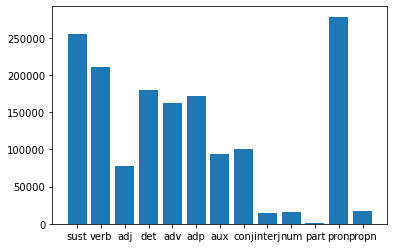

In [155]:
import matplotlib.pyplot as plt


plt.bar(range(len(categorías)), list(categorías.values()), align='center')
plt.xticks(range(len(categorías)), list(categorías.keys()))
# # for python 2.x:


plt.show()